In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [2]:
week_variation = {'Monday': 0, 'Tuesday': .25, 'Wednesday': 1, 'Thursday': 3, 'Friday': 5, 'Saturday': 10, 'Sunday': 7}

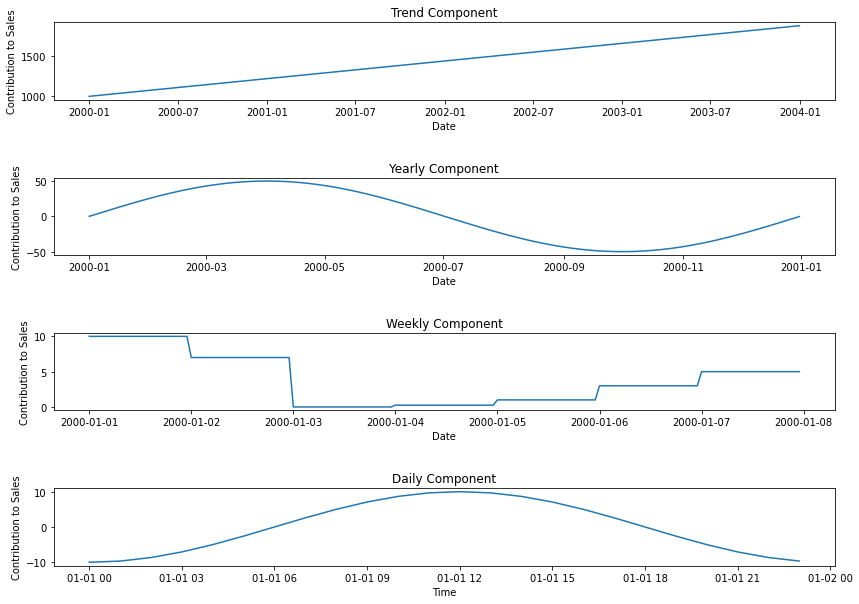

In [3]:
fig, axis = plt.subplots(4, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=1)

x = pd.date_range('2000-01-01','2003-12-31', freq='H')
y0 = [1000 + .025 * val for val in range(len(x))]  # create trend curve
axis[0].set_title('Trend Component')
axis[0].plot(x, y0)
axis[0].set_xlabel('Date')
axis[0].set_ylabel('Contribution to Sales')

y1 = [50 * np.sin(idx * (360 / (365.25 * 24)) * (np.pi / 180)) for idx in range(len(y0))]  # add annual sinusoidal variation
axis[1].set_title('Yearly Component')
axis[1].plot(x[:24 * 365], y1[:24 * 365])
axis[1].set_xlabel('Date')
axis[1].set_ylabel('Contribution to Sales')

y2 = [week_variation[x[idx].day_name()] for idx in range(len(y1))]  # add weekly variation
axis[2].set_title('Weekly Component')
axis[2].plot(x[:24 * 7], y2[:24 * 7])
axis[2].set_xlabel('Date')
axis[2].set_ylabel('Contribution to Sales')

y3 = [10 * np.sin((idx - 6) * (360 / (24)) * (np.pi / 180)) for idx in range(len(y2))]  # add daily sinusoidal variation
axis[3].set_title('Daily Component')
axis[3].plot(x[:24], y3[:24])
axis[3].set_xlabel('Time')
axis[3].set_ylabel('Contribution to Sales')

plt.show()

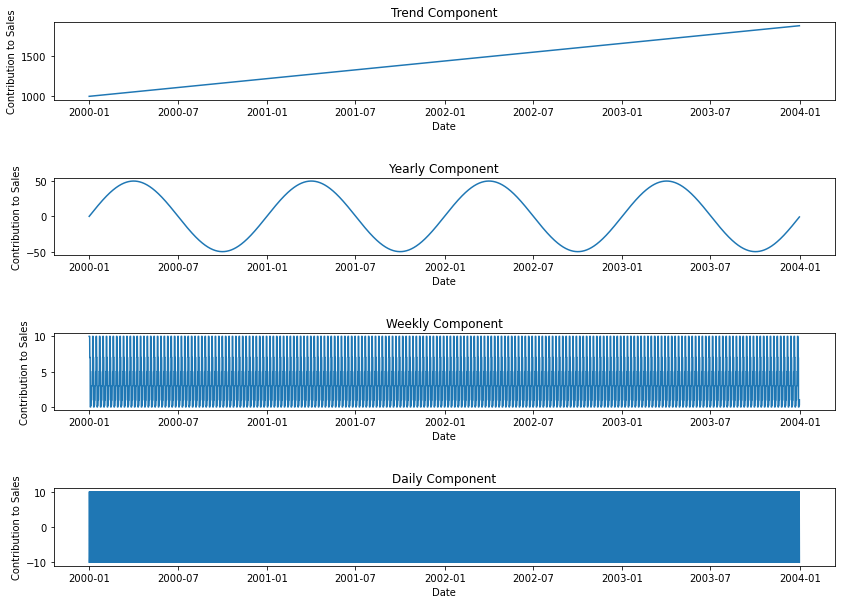

In [4]:
fig, axis = plt.subplots(4, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=1)

axis[0].set_title('Trend Component')
axis[0].plot(x, y0)
axis[0].set_xlabel('Date')
axis[0].set_ylabel('Contribution to Sales')

axis[1].set_title('Yearly Component')
axis[1].plot(x, y1)
axis[1].set_xlabel('Date')
axis[1].set_ylabel('Contribution to Sales')

axis[2].set_title('Weekly Component')
axis[2].plot(x, y2)
axis[2].set_xlabel('Date')
axis[2].set_ylabel('Contribution to Sales')

axis[3].set_title('Daily Component')
axis[3].plot(x, y3)
axis[3].set_xlabel('Date')
axis[3].set_ylabel('Contribution to Sales')

plt.show()

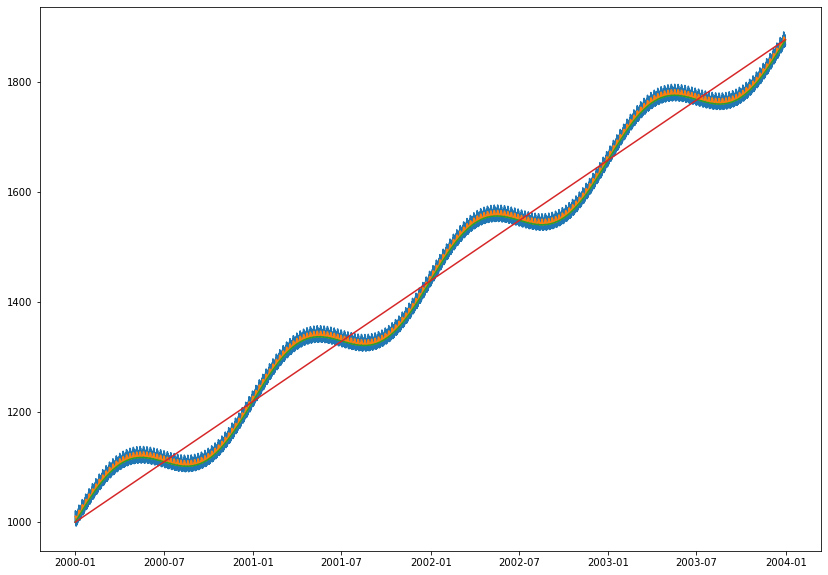

In [5]:
x = pd.date_range('2000-01-01','2003-12-31', freq='H')
y0 = [1000 + .025 * val for val in range(len(x))]  # create trend curve
y1 = [y0[idx] + 50 * np.sin(idx * (360 / (365.25 * 24)) * (np.pi / 180)) for idx in range(len(y0))]  # add annual sinusoidal variation
y2 = [y1[idx] + week_variation[x[idx].day_name()] for idx in range(len(x))]  # add weekly variation
y3 = [y2[idx] + 10 * np.sin((idx - 6) * (360 / (24)) * (np.pi / 180)) for idx in range(len(y2))]  # add daily sinusoidal variation
plt.figure(figsize=(14, 10))
# plt.scatter(x, y)
plt.plot(x, y3)
plt.plot(x, y2)
plt.plot(x, y1)
plt.plot(x, y0)
plt.show()

In [6]:
df = pd.DataFrame({'ds': x, 'y': [y3[idx] for idx in range(len(x))]})
df.head()

,ds,y
0,2000-01-01 00:00:00,1000.000000
1,2000-01-01 01:00:00,1000.401580
2,2000-01-01 02:00:00,1001.461423
3,2000-01-01 03:00:00,1003.111447
4,2000-01-01 04:00:00,1005.243353


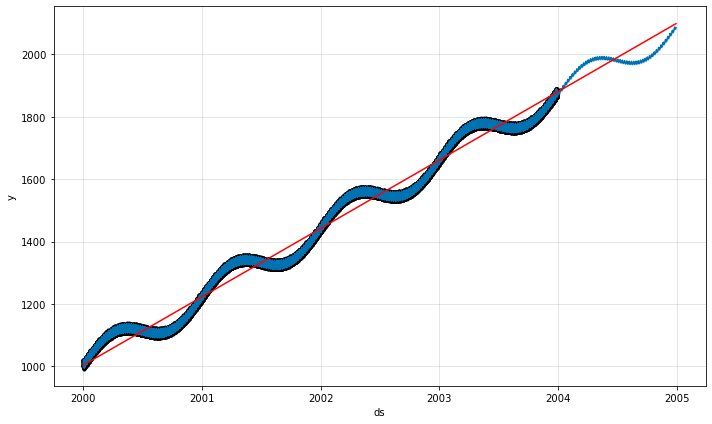

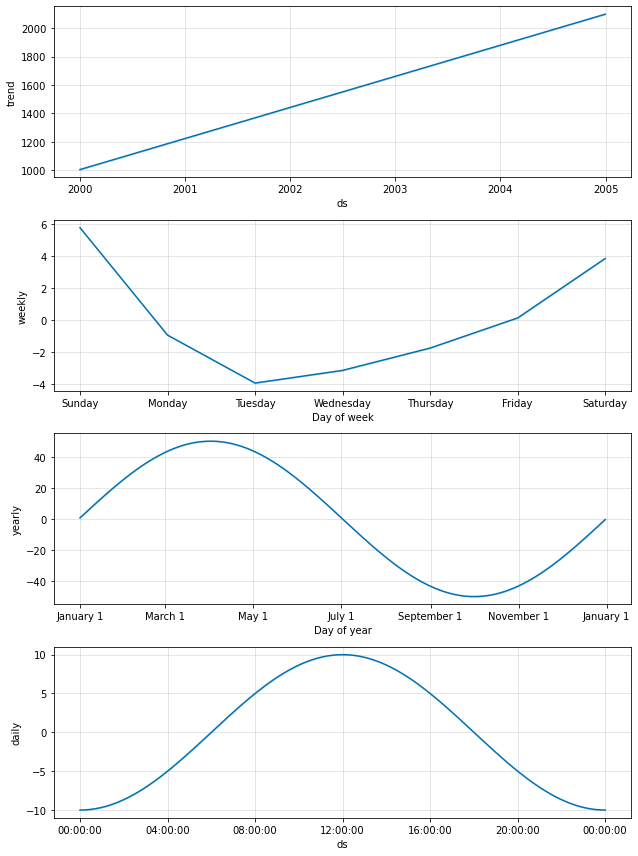

In [7]:
prophet = Prophet(daily_seasonality=1)
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()